## Step 1: Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess the Data

In [5]:
# Load dataset
data = pd.read_csv('/content/winequality-red.csv')

# Separate features and target variable
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values  # The last column

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

## Step 3: Initialize Parameters

In [6]:
def initialize_parameters(n_features):
    W = np.zeros(n_features)
    B = 0
    return W, B

n_features = X.shape[1]
W, B = initialize_parameters(n_features)

## Step 4: Define the Prediction Function

In [7]:
def predict(X, W, B):
    return np.dot(X, W) + B

## Step 5: Define the Cost Function


In [8]:
def compute_cost(X, y, W, B):
    m = len(y)
    predictions = predict(X, W, B)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

## Step 6: Implement Gradient Descent

In [9]:
def gradient_descent(X, y, W, B, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        predictions = predict(X, W, B)

        # Compute gradients
        dW = (1 / m) * np.dot(X.T, (predictions - y))
        dB = (1 / m) * np.sum(predictions - y)

        # Update parameters
        W -= learning_rate * dW
        B -= learning_rate * dB

        # Compute and store the cost
        cost = compute_cost(X, y, W, B)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Epoch {i}: Cost {cost}')

    return W, B, cost_history

## Step 7: Train the Model

In [10]:
learning_rate = 0.01
epochs = 1000

W, B, cost_history = gradient_descent(X, y, W, B, learning_rate, epochs)

Epoch 0: Cost 15.888342020222298
Epoch 100: Cost 2.3015942441588653
Epoch 200: Cost 0.48990369118679383
Epoch 300: Cost 0.2468321276356927
Epoch 400: Cost 0.2139620085657499
Epoch 500: Cost 0.20939476040272198
Epoch 600: Cost 0.2086923612800543
Epoch 700: Cost 0.2085453353461181
Epoch 800: Cost 0.2084929696736002
Epoch 900: Cost 0.20846473383225905


## Step 8: Plot the Cost Function

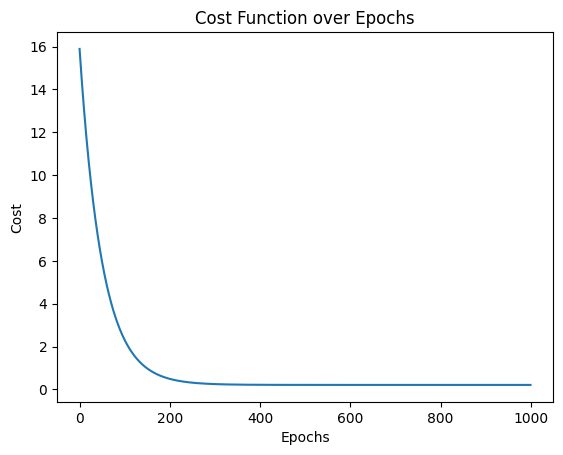

In [11]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

## Step 9: Make Predictions

In [12]:
# Predict on training data
predictions = predict(X, W, B)

## Step 10: Evaluate the Model

In [13]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Calculate MSE and R-squared
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.4168933182976397
R-squared: 0.360358148706196


## Additional Improvements and Extensions
- **Feature Engineering**: Add interaction terms and polynomial features to capture non-linear relationships.
- **Regularization**: Implement Lasso (L1) or Ridge (L2) regularization to prevent overfitting.
- **Cross-Validation**: Use cross-validation to ensure the model generalizes well to unseen data.

Below are code snippets for some of these techniques.

### Adding Polynomial Features
```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
```

### Regularization
Update the cost function to include a regularization term:
```python
def compute_cost_with_regularization(X, y, W, B, lambda_):
    m = len(y)
    predictions = predict(X, W, B)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    reg_cost = cost + (lambda_ / (2 * m)) * np.sum(np.square(W))
    return reg_cost
```

Update the gradient descent function to include regularization:
```python
def gradient_descent_with_regularization(X, y, W, B, learning_rate, epochs, lambda_):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        predictions = predict(X, W, B)
        
        # Compute gradients with regularization
        dW = (1 / m) * np.dot(X.T, (predictions - y)) + (lambda_ / m) * W
        dB = (1 / m) * np.sum(predictions - y)

        # Update parameters
        W -= learning_rate * dW
        B -= learning_rate * dB

        # Compute and store the cost
        cost = compute_cost_with_regularization(X, y, W, B, lambda_)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Epoch {i}: Cost {cost}')

    return W, B, cost_history
```

### Cross-Validation
```python
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def cross_validation_accuracy(X, y, cv=5):
    model = LinearRegression()
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return np.mean(scores)

cv_score = cross_validation_accuracy(X, y)
print(f'Cross-Validation Score: {cv_score}')
```